<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/Support_Vector_Machines/01_SVM_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

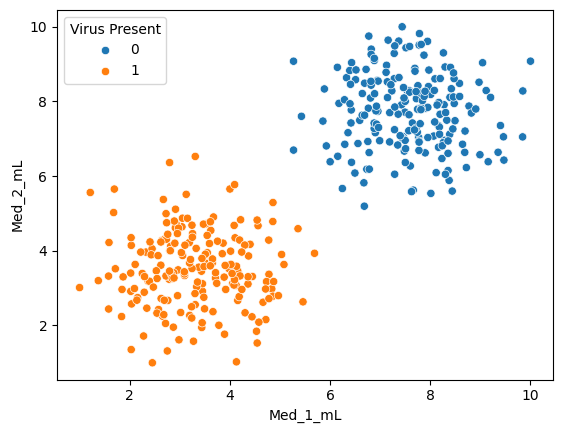

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

##try to create a hyperplane manually by assuming m=-1 and b=11 from the scatterplot

In [5]:
X = np.linspace(0,10,100)

m=-1
b=11
y=m*X+b

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

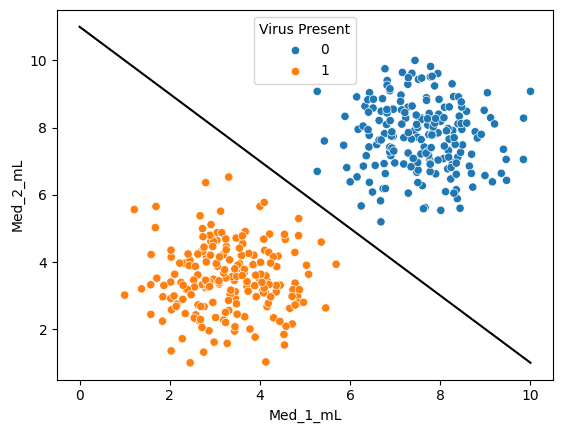

In [6]:
plt.plot(X,y,'black')
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

In [7]:
from sklearn.svm import SVC

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [11]:
y= df['Virus Present']
X= df.drop('Virus Present',axis=1)

In [13]:
model = SVC(kernel='linear',C=1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [15]:
from svm_margin_plot import plot_svm_boundary

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


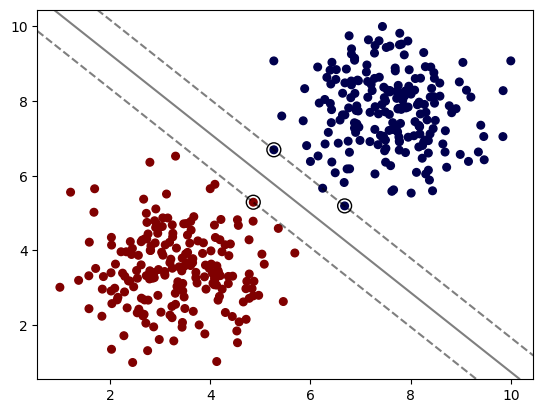

In [16]:
plot_svm_boundary(model,X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


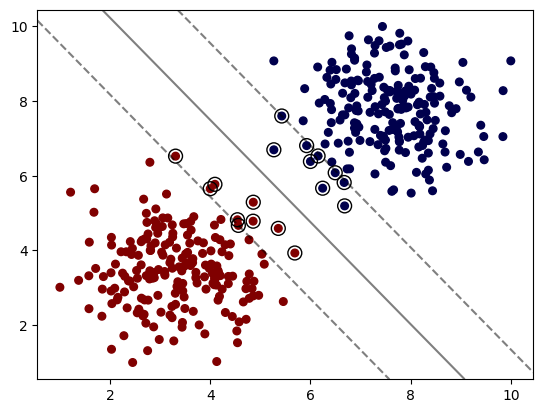

In [17]:
model = SVC(kernel='linear',C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


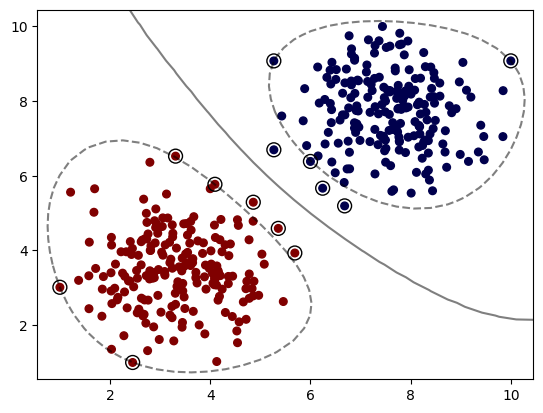

In [18]:
model = SVC(kernel='rbf',C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


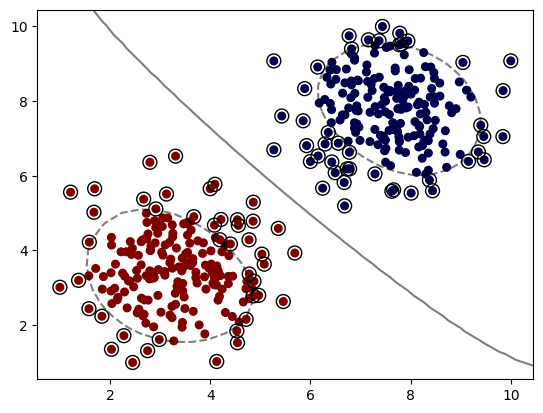

In [20]:
model = SVC(kernel='rbf',C=0.05,gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


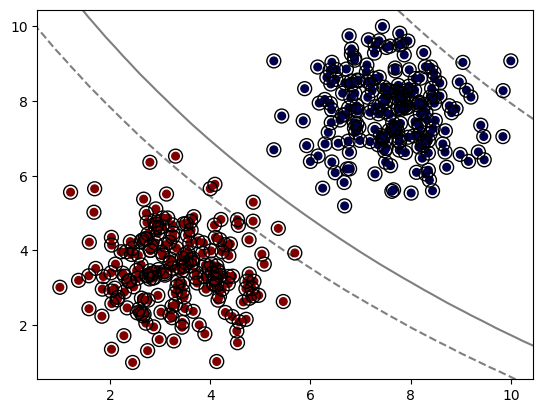

In [21]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


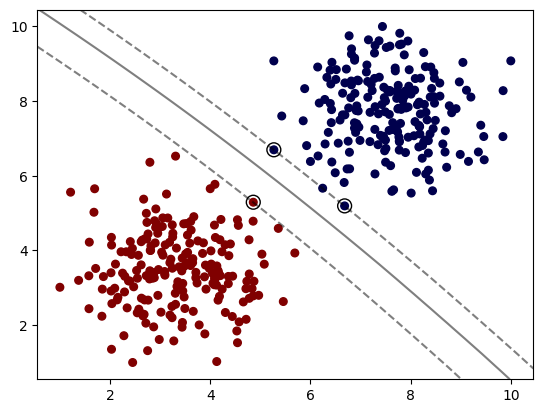

In [23]:
model = SVC(kernel='poly',degree=5,C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [26]:
from sklearn.model_selection import GridSearchCV

svm= SVC()
param_grid = {'C': [0.01,0.1,1],'kernel' : ['linear','rbf']}

grid = GridSearchCV(svm, param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [27]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}